# **ISAT 449 - Emerging Topics in Applied Data Science**
### Using TensorFlow 2.x Keras Layers
## Building a Dense Neural Network with TensorFlow 2.x Keras

The previous lesson was just to get you used to the learning environment and the concepts involved in building machine learning models. Now, in this part, let's really see the power andease of use in builing more sophisticated models with the TensorFlow 2.x implementation of Keras, tf.keras

## **Learning Objectives**



*   Learn how to build a Dense neural networks with TensorFlow 2.x and Keras
*   Learn different appraches to stacking layers or artificial neurons to build multi-layer machine learning models
*   Construct models for Linear regression and classification
*   Train the model on NumPy generated data
*   Create simple datasets for exploring model architectures
*   Use the model's history to plot the loss and accuracy during training
*   Check the model's accuracy with your test data

### **Let's import tensorflow and some helper modules**


In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd
print("Tensorflow Version:", tf.__version__)

Tensorflow Version: 2.7.0


## **Dense Models**
### **Sequential model**

In Keras, you assemble layers to build models. A model is (usually) a stack or graph of layers. The most common type of model is a stack of layers: the tf.keras.Sequential model.  Let's use the tf.keras.Sequential model build a simple, fully-connected feed-forward neural network (i.e. multi-layer perceptron) which is also called a Dense neural network. tf.keras has several ways of building models. 

Below we illustrate two of the methods for building neural networks with tf.keras

### **Method 1- Explicitly Creating and Stacking the layers in a Python List**

Using the Python lists explicitly as we did in the last lesson emphasized the core sequential nature of building models with tf.keras

### **Practice Problem 1: Build a Dense neural Network for Regression**

Let's build a model of a fully-connected feed-forward neural network (i.e. multi-layer perceptron) also called a Dense neural network. The tf.keras Sequential class is used to implement the feed-forward neural network. We will build a regression model using a Dense network and numpy generated data.

## **Generate some data using NumPy**

For illustrative purposes, let's also create in-memory, small, NumPy generated dataset arrays to train and evaluate our model.



In [2]:
#Generate a 2-D array with 1000 rows, each row containing 5 random floats from 0 to 1
x_train = np.random.normal(size =(1000, 5))
#Generate a 1-D array containing 1000 random integers from 0 to 5
y_train = np.random.randint(2, size=1000)
#Generate a 2-D array with 100 rows, each row containing 5 random floats from 0 to 1
x_test = np.random.normal(size = (100,5))
#Generate a 1-D array containing 100 random integers from 0 to 5
y_test = np.random.randint(2, size = (100))
#y_train

### tf.keras needs the the shape of the input feature array

In [3]:
# quick way to get input shape for tensorflow-keras 
x_train.shape[1:]

input_shape = x_train.shape[1:]

print('input shape of the feature matrix is: ', input_shape)

input shape of the feature matrix is:  (5,)


## **Create the layers**

In [4]:
# the input layer to the model informs it of the shape of you features dataset
l0 = tf.keras.layers.Dense(units = 32, input_shape = input_shape) # output layer has 32 neurons

# Adds a densely-connected layer with 16 units to the model:
l1 = tf.keras.layers.Dense(units = 16, activation = 'relu')

# Adds another densely-connected layer with 1 units to the model
l2 = tf.keras.layers.Dense(units = 1) #regression. this output layer has no activation function!

## **Assemble the layers**

In [5]:
# build the Sequential model as a list. recall, the elements in a list are indexed according to
# a definite sequence(ordered!) and the indexing of a list begins with 0 being the first index.
model = tf.keras.Sequential([l0, l1, l2])

## **Compile and Train the Model**

In [6]:
#compile the model
model.compile(optimizer= 'SGD',
              loss = 'mse',
              metrics = ['accuracy'])

# train the model by calling the fit method 
history = model.fit(x_train, y_train, validation_split=0.1, epochs=5, verbose = 1) #use 10% of training set for validation

Epoch 1/5
29/29 [==============================] - 1s 12ms/step - loss: 0.4576 - accuracy: 0.5022 - val_loss: 0.3293 - val_accuracy: 0.4100
Epoch 2/5
29/29 [==============================] - 0s 3ms/step - loss: 0.2921 - accuracy: 0.5156 - val_loss: 0.3034 - val_accuracy: 0.4300
Epoch 3/5
29/29 [==============================] - 0s 4ms/step - loss: 0.2773 - accuracy: 0.5267 - val_loss: 0.2914 - val_accuracy: 0.4400
Epoch 4/5
29/29 [==============================] - 0s 4ms/step - loss: 0.2689 - accuracy: 0.5200 - val_loss: 0.2796 - val_accuracy: 0.4400
Epoch 5/5
29/29 [==============================] - 0s 4ms/step - loss: 0.2631 - accuracy: 0.5211 - val_loss: 0.2705 - val_accuracy: 0.4500


## **Display metrics**

In [7]:
# printing model metrics
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.457552,0.502222,0.329283,0.41,0
1,0.292102,0.515556,0.303402,0.43,1
2,0.277269,0.526667,0.291357,0.44,2
3,0.268866,0.520000,0.279630,0.44,3
4,0.263077,0.521111,0.270493,0.45,4


## **Plot loss**

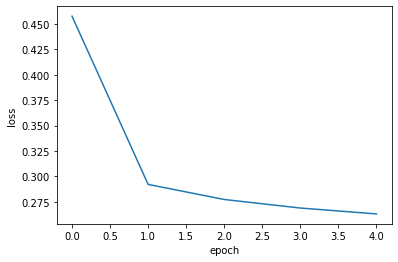

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('epoch')
plt.ylabel("loss")
plt.plot(history.history['loss'])
plt.show()

## **Evaluate the model**

In [9]:
# Finally, let's compare how the model performs on the test dataset:
test_loss,test_acc = model.evaluate(x_test,y_test,verbose=1)
print('The test set loss is:{0:0.4f} and the test set accuracy is:{1:0.4}%'.format(test_loss,100*test_acc))

4/4 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.5200
The test set loss is:0.2781 and the test set accuracy is:52.0%


## **Make a prediction**

In [10]:
model.predict([[1,2,3,4,5]])
#print(x_test[4:5])

array([[1.3494017]], dtype=float32)

## **Comments**

tf.keras.model.compile takes three important arguments:


*   optimizer: This object specifies the training procedure. Pass it optimizer instances from the tf.train module, such as tf.train.AdamOptimizer, tf.train.RMSPropOptimizer, or tf.train.GradientDescentOptimizer.
*   loss: The function to minimize during optimization. Common choices include mean square error (mse), categorical_crossentropy, and binary_crossentropy. Lossfunctions are specified by name or by passing a callable object from the tf.keras.losses module.
*   metrics: Used to monitor training. These are string names or callables from the tf.keras.metrics module.






## **Method 2 - Create the Sequential model by passing a list of layer instances to the constructor**

Previously we demonstated model building using a Python list such that:



*   Each layer of units (neurons) could be created outside the Sequential Class
*   Then they could all be passed to the Sequential model as a list in a linear stack of layers.
*   When a model is created upon instantiation of the Sequential Class, this list is passed to its constructor as a list of layer instances

There are several other methods to create and stack layers with tf.keras such as the .add() method. You should explore them! For the remainder of this course we the Sequential class with layer created inside the class. This is the one of the simplest and widely used approaches to quickly create and stack the layers of artificial neurons in dense networks. Let's use this approach to build a fully-connected network (i.e. multi-layer perceptron) feed- forward network (called a Dense Neural Network) to solve a simple binary classifcation problem.


Practice Problem 2
### **bold text**

Build a machine learning model for **binary classification** that can classify colors into either red or blue based on the three RGB color channels, R (Red), G (Green), and B (Blue).

### **Solution**

*   It can be solved linearly(don't need hidden layers) but I chose to use one hidden layer.
*   There will be a single neuron in the output layer with an activation function.
*   The network architecture is easy to envision (draw it!)

The workflow is:

*   Create the training data (features and labels)
*   Building and connect the neural networks layers
*   Select loss function and optimizer to assess the prediction error
*   Compile and train the model
*   Use the model's history to plot the loss and accuracy during training
*   Check the model's prediction accuracy with test data







In [11]:
import tensorflow as tf
import numpy as np

# Create training dataset  
x_train = np.array([[255, 0,0],
                    [248,80,68],
                    [0,0,255],
                    [67,15,210]], dtype='float')

# Create training labels 
# y_train = np.array([1, 1, 0, 0],    dtype='float')
y_train = np.array([[1], [1], [0], [0] ], dtype = 'float')

# model has an input layer and a hidden and output layer, each with one neuron (units)
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = 10 , input_shape = (3,)),
        tf.keras.layers.Dense(1, activation= 'sigmoid')
])


#compile the model
learning_rate = 0.1
model.compile(
    optimizer = tf.keras.optimizers.RMSprop(lr = learning_rate),
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ['accuracy']
)

#show model architecture
model.summary()

history = model.fit(x_train, y_train, epochs= 100, verbose = 0)

test_set = [[248,80,68], [0,0,255]]

print('The model predicts for the two inputs', model.predict(test_set))

print('\nThe expected value are: [1] for [248, 80, 68] and [0.0] for [0, 0, 255]')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                40        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


The model predicts for the two inputs [[1.]
 [0.]]

The expected value are: [1] for [248, 80, 68] and [0.0] for [0, 0, 255]


### **Note**

The binary cross-entropy is just a technical term for the cost function in the logistic regression, and the categorical cross-entropy is its generalization for multiclass predictions via softmax, which we will cover in the section estimating class probabilities in multiclass classification via the softmax function later in this course.

So this simple model is performing quite well and you have now trained a simple binary classifier with ~98% accuracy on this very small dataset. However, you should not take the results to seriously because with a dataset this small, the model is very likely overfitting, i.e memorizing the pattern.

### **Practice Problem 3: MNIST classification with TensorFlow and Keras!**

Tensorflow version: 2.7.0
313/313 [==============================] - 1s 2ms/step - loss: 0.1158 - accuracy: 0.9650
[[1.1078785e-05 7.5603680e-07 2.1593696e-04 1.6498623e-03 1.6641291e-08
  9.0921949e-06 1.5002435e-09 9.9804688e-01 1.2337908e-06 6.5105312e-05]]


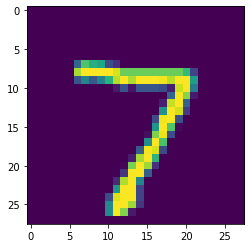

In [13]:
import tensorflow as tf 
import matplotlib.pyplot as plt
print('Tensorflow version:', tf.__version__)

#get MNIST data from repo
mnist=tf.keras.datasets.mnist

#load mnist data
(images_train, labels_train), (images_test, labels_test) = mnist.load_data()

#normalize training set data
images_train, images_test = images_train / 255.0, images_test / 255.0

#create list of class names as strings
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six',
               'seven', 'eight', 'nine']

# Note the input layer to the model. It consist of the image which gets flattened
# into a one-dimensional vector (array) with 784 entries reprenting the pixel values
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), 
    tf.keras.layers.Dense(units = 512 , activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation='softmax')
])


model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(images_train, labels_train, epochs =1, verbose = 1)


model.evaluate(images_test, labels_test)

# make prediction
print(model.predict(images_test[0].reshape(-1, 28,28)))

#show image
plt.imshow(images_test[0])





In [15]:
model.predict(images_train[0].reshape(-1,28,28))



array([[5.1169712e-07, 3.1399807e-07, 2.0227046e-05, 1.9057885e-02,
        2.1386530e-10, 9.8090875e-01, 4.2894914e-09, 1.0401401e-05,
        5.0983616e-08, 1.8165424e-06]], dtype=float32)

## **Configuring Models for Training**


There are many ways to configure a model to get the best performance and it often relies on a little trial and error. The following code snippets shows a couple of examples ofconfiguring a model for training:



```
# Configure a model for mean-squared error regression.
model.compile(optimizer=tf.train.AdamOptimizer(0.01),
              loss='mse',# mean squared error
              metrics=['mae'])# mean absolute error

# Configure a model for categorical classification.
model.compile(optimizer=tf.train.RMSPropOptimizer(0.01),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=[tf.keras.metrics.categorical_accuracy])
```

## **Exercises**
### **These problems are ALL or NONE. No partial credit on either exercise.**
### **Exercise 1 (20 points)**

Build a simple tf.keras neural network(one input, hidden and output layer) to implement an OR gate. The hidden and output layer should consist of a single neuron. The **output activation function should be a sigmoid**. You should solve this as a complete end-to-end machine learning problem including all steps in the workflow:


*   Create the training data (features and labels)
*   Build and stack the neural networks layers to create model
*   Select loss function and optimizer to assess the prediction error
*   Compile the model
*   Show model archtecture
*   Train the model
*   Use the model's history to plot the loss and accuracy during training
*   Check the model's prediction accuracy with test data

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                30        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


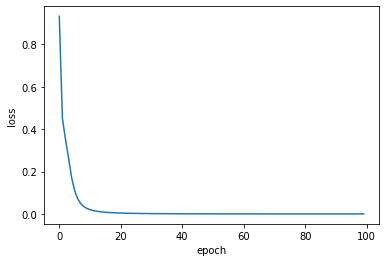

The model predicts for the 4 inputs 
 [[3.520011e-05]
 [9.999883e-01]
 [9.999882e-01]
 [1.000000e+00]]

The expected values are: [0] for [0,0] and [1] for [0,1], [1,0], and [1,1].
The model predicted correctly for all testing data.


In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# Create training dataset  
x_train = np.array([[0,0], [0,1], [1,0], [1,1]], dtype='float')

# Create training labels 
y_train = np.array([[0], [1], [1], [1] ], dtype = 'float')

# model has an input layer and a hidden and output layer, each with one neuron (units)
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = 10 , input_shape = (2,)),
        tf.keras.layers.Dense(1, activation= 'sigmoid')
])

#compile the model
learning_rate = 0.1
model.compile(
    optimizer = tf.keras.optimizers.RMSprop(lr = learning_rate),
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ['accuracy']
)

#show model architecture
model.summary()

history = model.fit(x_train, y_train, epochs= 100, verbose = 0)

#plot the loss
plt.xlabel('epoch')
plt.ylabel("loss")
plt.plot(history.history['loss'])
plt.show()


test_set = [[0,0], [0,1], [1,0], [1,1]]

print('The model predicts for the 4 inputs \n', model.predict(test_set))

print('\nThe expected values are: [0] for [0,0] and [1] for [0,1], [1,0], and [1,1].')
print('The model predicted correctly for all testing data.')

### **Exercise 2 (15 pts)**

Rebuild the model from Exercise 1 by changing the **output activation function to a softmax**. You may also need to modify/change other parameters, optimizers and loss functions. Give a proper interpretation of your model's predictions. **Do all of the work here, including your imports, and, in not more than two cells**.

In [17]:
import tensorflow as tf
import numpy as np

# Create training dataset  
x_train = np.array([[0,0], [0,1], [1,0], [1,1]], dtype='float')

# Create training labels 
y_train = np.array([[0], [1], [1], [1] ], dtype = 'float')

# model has an input layer and a hidden and output layer, each with one neuron (units)
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = 10 , input_shape = (2,)),
        tf.keras.layers.Dense(1, activation= 'softmax')
])

#compile the model
learning_rate = 0.1
model.compile(
    optimizer = tf.keras.optimizers.RMSprop(lr = learning_rate),
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ['accuracy']
)

#show model architecture
model.summary()

history = model.fit(x_train, y_train, epochs= 1000, verbose = 0)

test_set = [[0,0], [0,1],[1,0] , [1,1]]

print('The model predicts for the 4 inputs \n', model.predict(test_set))

print('\nThe expected values are: [0] for [0,0] and [1] for [0,1], [1,0], and [1,1].')
print('The model did not predict correctly for all testing data.  The model predicted correctly for [0,1], [1,0], and [1,1].')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                30        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
The model predicts for the 4 inputs 
 [[1.]
 [1.]
 [1.]
 [1.]]

The expected values are: [0] for [0,0] and [1] for [0,1], [1,0], and [1,1].
The model did not predict correctly for all testing data.  The model predicted correctly for [0,1], [1,0], and [1,1].


**Even after trying different parameters for the compilation of the model, I was never able to get the model to correctly predict for the first input of the testing set: [0,0].  The model always predicted the value 1 for these values, but in an or gate the values [0,0] would correlate to an output of 0.**